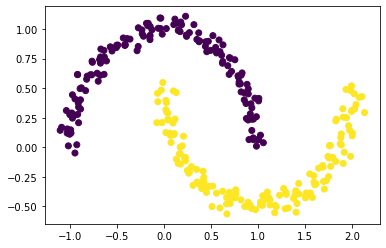

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

#加载数据
x, y = make_moons(n_samples=300, noise=0.05, random_state=42)

#画图
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [2]:
#被访问过的放这里
visited = []

#被分组过的放这里
grouped = []

#分组结果
groups = []

visited, grouped, groups

([], [], [])

In [3]:
#求一个点周围的邻居
def get_neighbors(xi):
    diff = x - xi

    diff = diff**2

    diff = diff.sum(axis=1)

    diff = diff**0.5

    #这里的0.2是超参数，是画圆的半径
    diff = diff <= 0.2

    return np.where(diff)[0]


get_neighbors(x[0])

array([  0,  17,  34, 119, 144, 158, 160, 171, 180, 193, 203, 205, 228,
       229, 234, 241, 258, 291])

In [4]:
#获取一个没有访问过的x索引
def get_unvisited_idx():
    for i in range(len(x)):
        if i not in visited:
            return i
    return None


get_unvisited_idx()

0

In [5]:
#从一个中心点开始扩散成一个组
def build_group(i, group):
    #如果一个点已经被访问过，则不进行任何计算
    if i in visited:
        return

    #标记这个点已经被访问过了
    visited.append(i)

    #获取这个点所有的邻居
    neighbors = get_neighbors(x[i])

    #如果邻居数小于5，说明不是中心点，不进行任何计算
    if len(neighbors) < 5:
        return

    #如果是中心点，把它加入到组中
    if i not in grouped:
        group.append(i)
        grouped.append(i)

    #遍历中心点的所有邻居，如果在它的邻居中也有中心点，则扩散
    for j in neighbors:
        #如果邻居还没有被分过组，则归入中心点的组
        if j not in grouped:
            group.append(j)
            grouped.append(j)

        build_group(j, group)


#遍历直到所有点被访问
while True:
    i = get_unvisited_idx()
    if i == None:
        break

    #每次重新开始扩散，是一个新的组
    group = []
    build_group(i, group)
    
    if group:
        groups.append(group)

print(groups)

[[0, 17, 34, 12, 5, 4, 10, 29, 22, 23, 67, 104, 1, 134, 26, 42, 16, 27, 54, 79, 75, 55, 98, 135, 111, 125, 114, 52, 46, 47, 15, 49, 60, 72, 93, 100, 105, 152, 156, 192, 155, 113, 167, 145, 183, 150, 182, 185, 186, 172, 175, 194, 231, 262, 269, 279, 248, 214, 225, 197, 221, 129, 154, 166, 206, 117, 178, 232, 196, 211, 268, 217, 240, 283, 298, 238, 233, 280, 285, 293, 266, 274, 239, 199, 171, 119, 144, 160, 193, 118, 6, 58, 69, 14, 9, 50, 63, 64, 96, 103, 73, 90, 122, 108, 123, 31, 19, 28, 2, 81, 136, 153, 80, 121, 132, 138, 137, 142, 273, 128, 158, 180, 203, 228, 205, 222, 229, 241, 258, 234, 246, 275, 284, 295, 291, 244, 247, 168, 187, 204, 161, 218, 191, 223, 282, 242, 265, 276, 272, 288], [3, 8, 36, 62, 139, 89, 30, 33, 59, 32, 65, 66, 82, 88, 95, 107, 148, 102, 94, 13, 25, 38, 126, 163, 164, 177, 198, 189, 173, 216, 169, 11, 43, 45, 61, 68, 99, 53, 20, 39, 41, 44, 37, 57, 40, 56, 70, 7, 24, 48, 21, 35, 83, 71, 74, 110, 51, 106, 116, 18, 97, 165, 124, 127, 130, 141, 176, 179, 207, 20

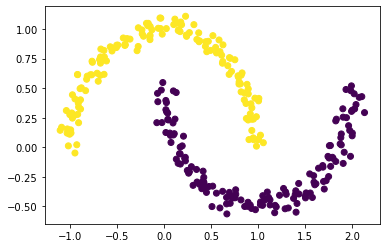

In [6]:
#结果画图
predict = np.zeros_like(y)

for i in range(len(groups)):
    predict[groups[i]] = i

plt.scatter(x[:, 0], x[:, 1], c=predict)
plt.show()